In [146]:
## 4.1 Data Preprocessing & Exploration
### 4.1.1 Data Loading & Cleaning

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Load Dataset
df = pd.read_csv('Data/diabetes.csv')


In [147]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
df.shape

(768, 9)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
# Review the Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [151]:
# Show missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [152]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [153]:
# Replace invalid zeros with NaN in relevant columns
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
df[invalid_cols] = imputer.fit_transform(df[invalid_cols])

# Drop duplicates
df = df.drop_duplicates()

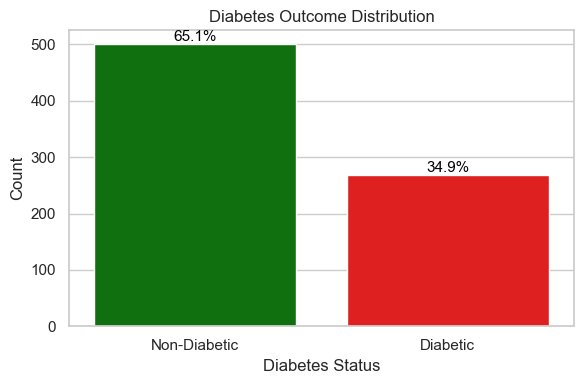

In [154]:
### 4.1.2 Exploratory Data Analysis (EDA)
#### Outcome Distribution - To see how many individuals (%) in the dataset have diabetes (Outcome = 1) versus those who don't (Outcome = 0).

# Define custom colors for 0 (Non-Diabetic) and 1 (Diabetic)
custom_palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(6, 4))

# Count plot with hue set and custom colors
ax = sns.countplot(x='Outcome', hue='Outcome', data=df, palette=custom_palette, legend=False)

# Set tick positions and custom labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])

# Add percentage labels above bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom',
                fontsize=11, color='black')

# Title and axis labels
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

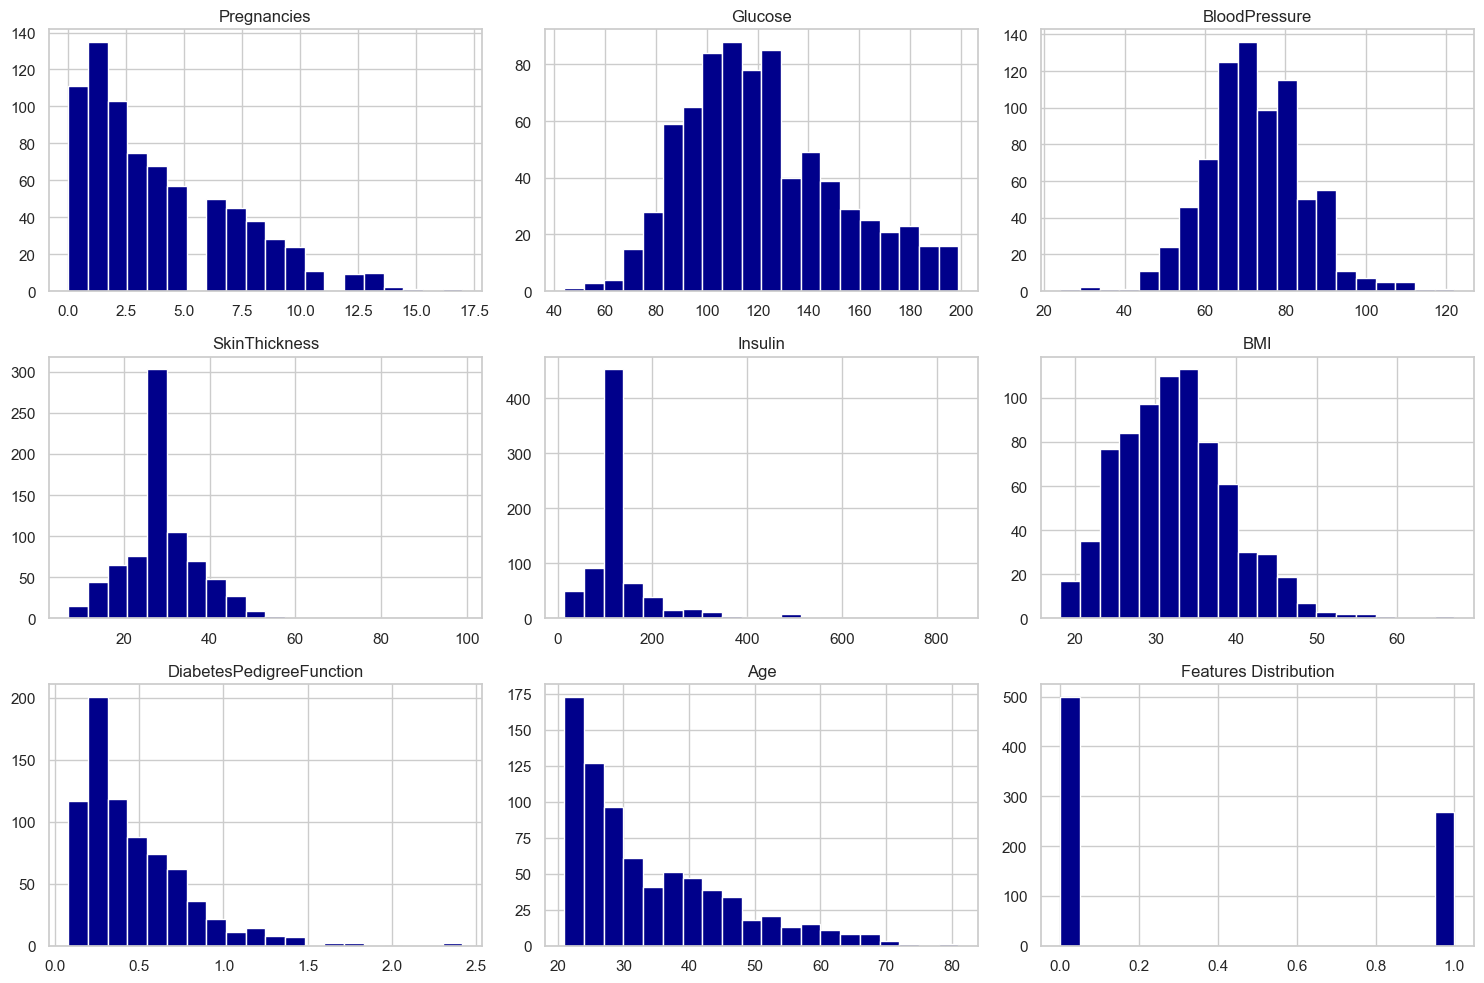

In [155]:
#### Histograms - To visualize how features like BMI, Glucose, Age, Insulin are distributed across the population.

df.hist(bins=20, figsize=(15, 10), color='darkblue')
plt.title("Features Distribution")
plt.tight_layout()
plt.show()


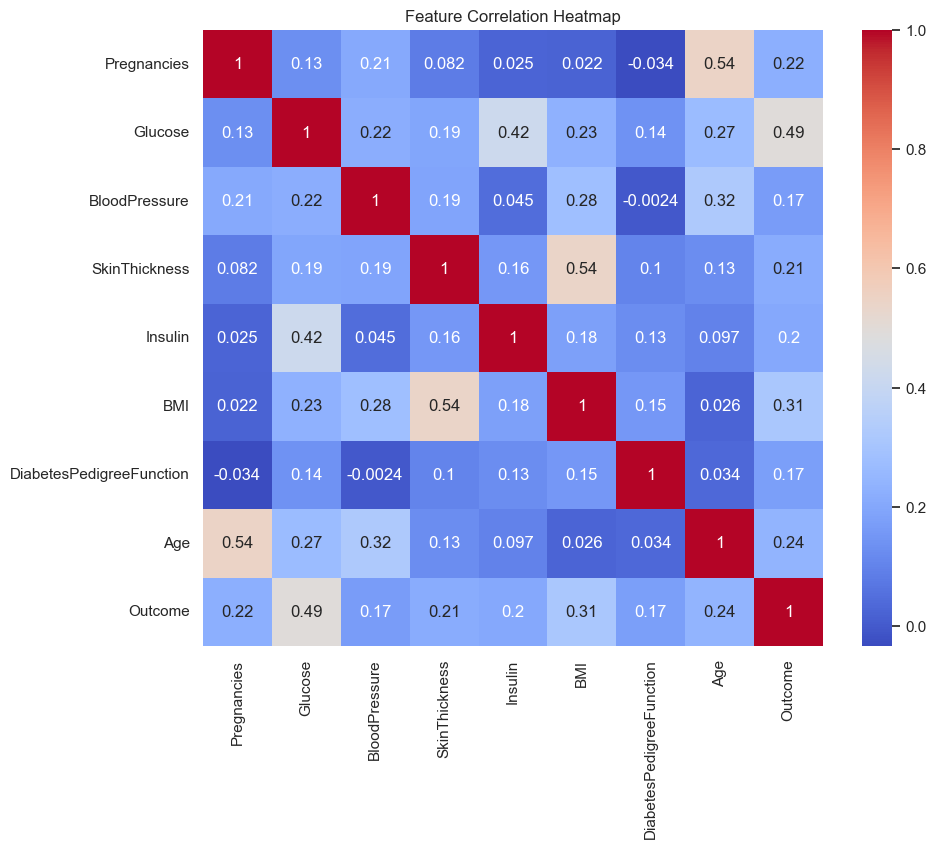

In [156]:
#### Correlation Heatmap - To check how features are related to each other and to the Outcome.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


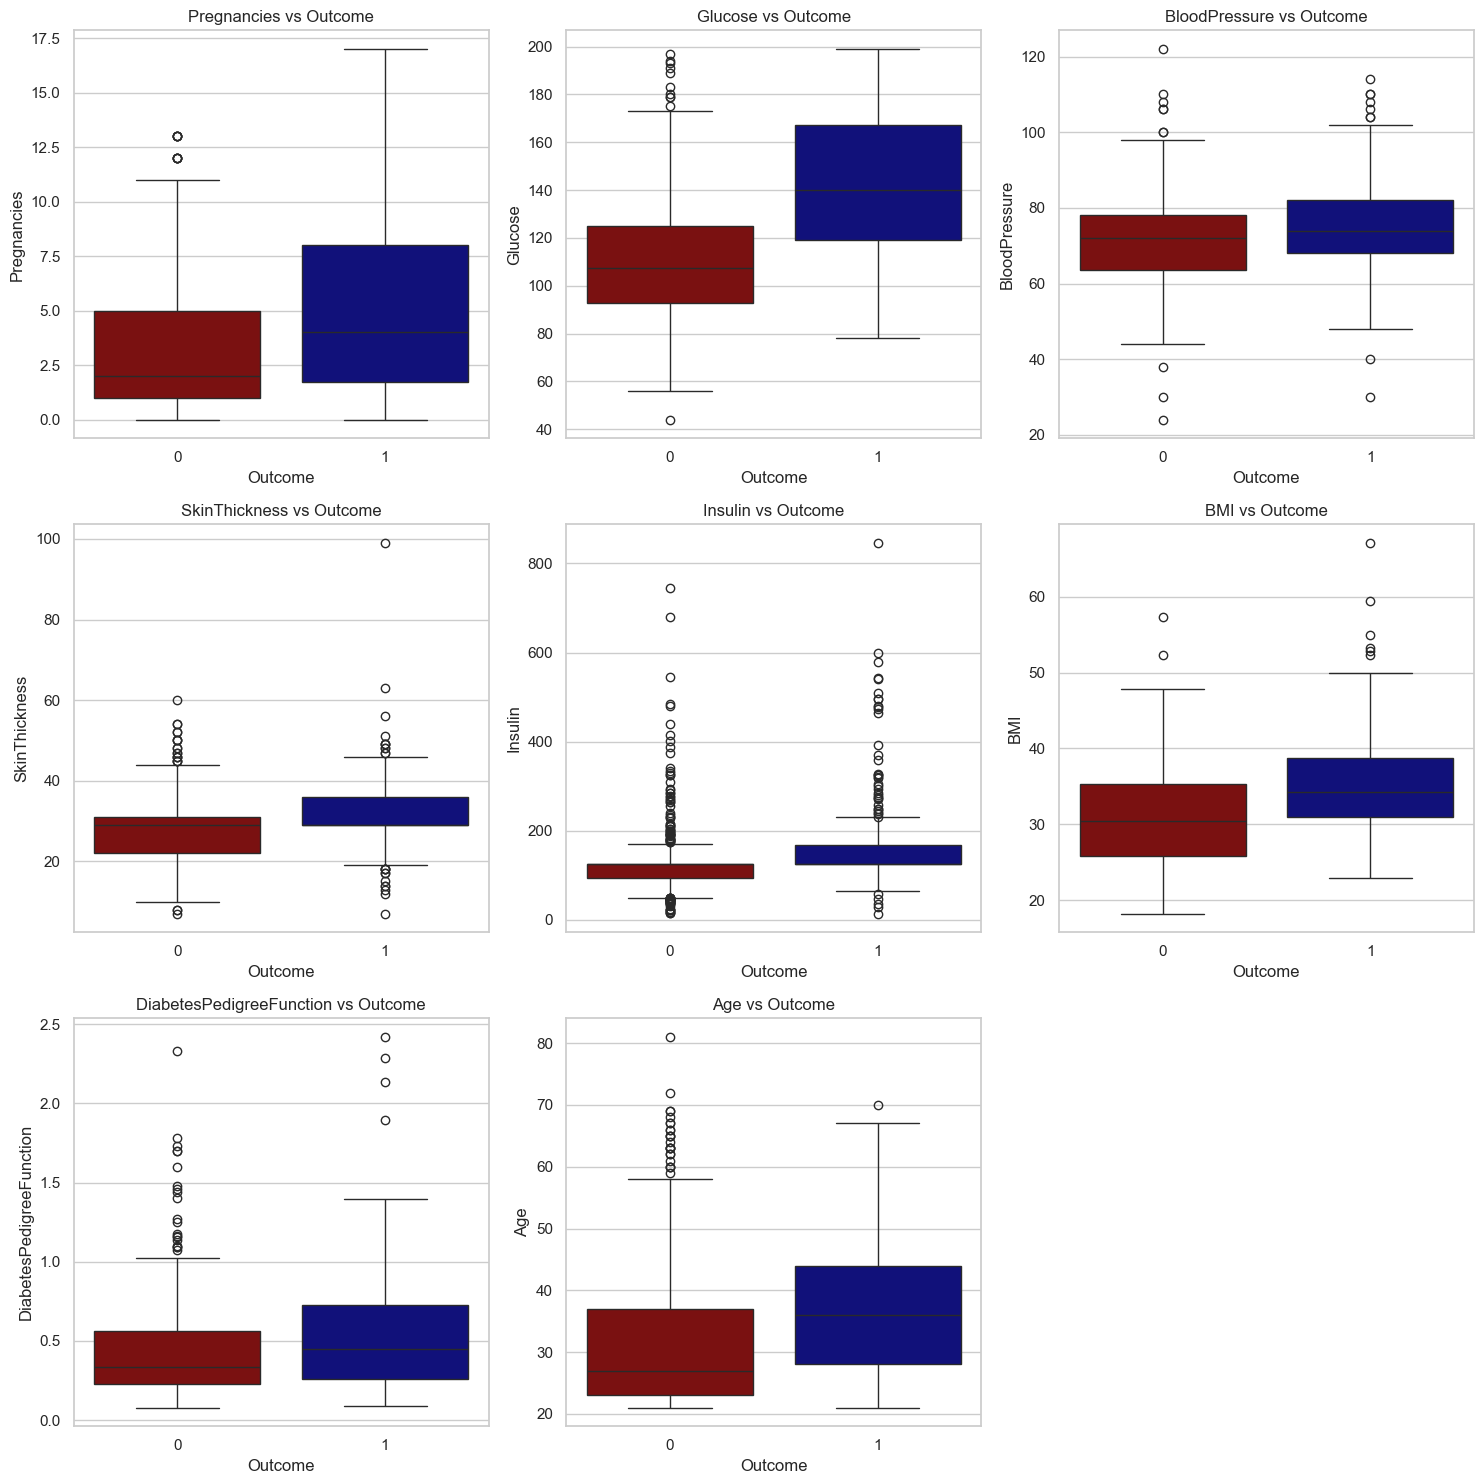

In [157]:
#### Boxplots & Violin Plots - To compare feature value distributions across diabetic and non-diabetic groups.

cols_per_row = 3
total_plots = len(df.columns[:-1])
rows = (total_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 5 * rows))
axes = axes.flatten()

# You can use a Seaborn dark palette or a custom one
palette = ['darkred', 'darkblue']  # 0 and 1 for Outcome

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='Outcome', y=col, data=df, hue='Outcome',
                palette=palette, ax=axes[i], legend=False)
    axes[i].set_title(f'{col} vs Outcome')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


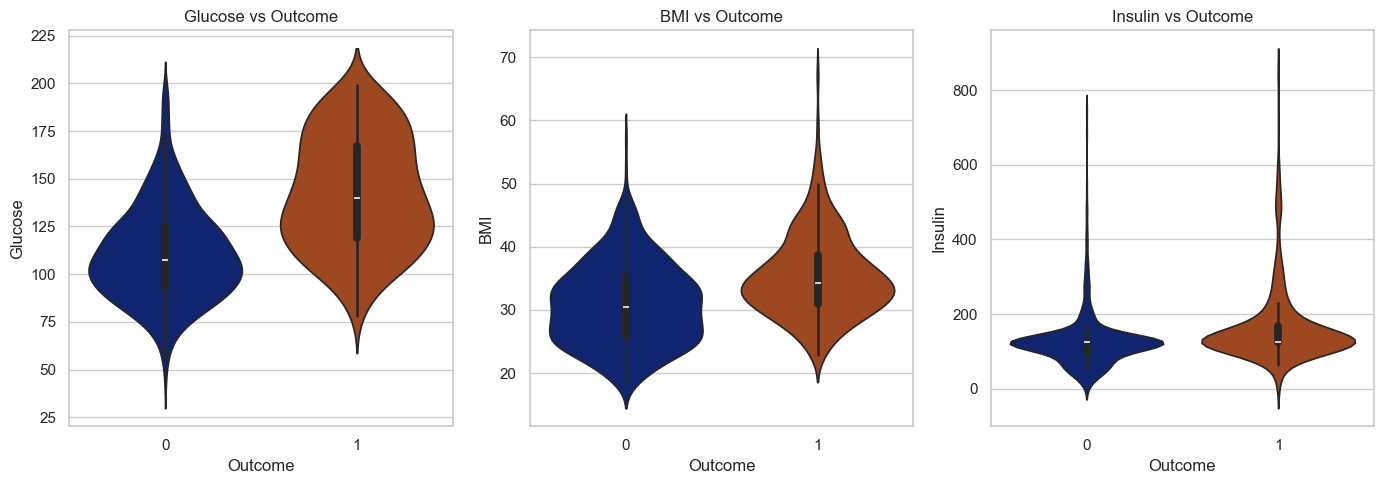

In [158]:
# Violin Plots - To view both distribution shape and spread of each feature within each class.

plt.figure(figsize=(14, 5))

for i, col in enumerate(['Glucose', 'BMI', 'Insulin']):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(x='Outcome', y=col, data=df, hue='Outcome',
                   palette='dark', legend=False)
    plt.title(f'{col} vs Outcome')

plt.tight_layout()
plt.show()


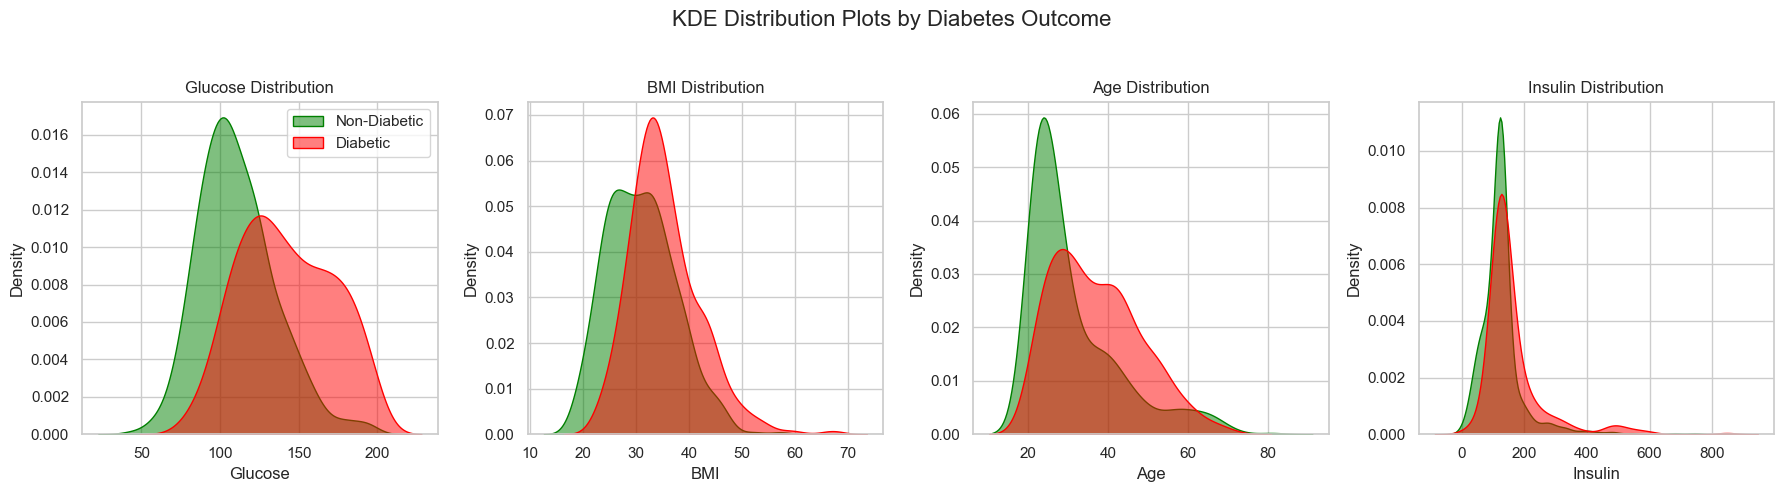

In [159]:
# KDE Plot - To Directly compare feature distributions

import seaborn as sns
import matplotlib.pyplot as plt

# Select features to compare
features = ['Glucose', 'BMI', 'Age', 'Insulin']

# Set up FacetGrid for side-by-side plots
fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=df[df['Outcome'] == 0], x=feature, fill=True, ax=ax, label='Non-Diabetic', color='green', alpha=0.5)
    sns.kdeplot(data=df[df['Outcome'] == 1], x=feature, fill=True, ax=ax, label='Diabetic', color='red', alpha=0.5)
    
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Keep legend only for the first subplot
    if i == 0:
        ax.legend()
    else:
        legend = ax.get_legend()
        if legend:
            legend.remove()

plt.suptitle('KDE Distribution Plots by Diabetes Outcome', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




In [160]:
#Address Outliers for Insulin

df['Insulin_log'] = np.log1p(df['Insulin'])


In [161]:
# Feature Engineering

# Define age bins and labels - Helps categorize patients into clinical age brackets which might carry more significance than continuous age in some models or visualizations.

bins = [20, 30, 40, 50, 60, 80]
labels = ['20s', '30s', '40s', '50s', '60+']

# Add new categorical feature
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)


In [162]:
#Glucose-to-Insulin Ratio - Useful for reflecting insulin sensitivity (higher ratio = more likely insulin resistance)

df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1)


In [163]:
# Drop Features with Low Variance or Weak Correlation - Reduces noise and dimensionality if the feature does not contribute meaningfully to predictions.
df.drop(['SkinThickness', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [164]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Insulin_log,AgeGroup,Glucose_Insulin_Ratio
0,6,148.0,72.0,125.0,33.6,50,1,4.836282,40s,1.174603
1,1,85.0,66.0,125.0,26.6,31,0,4.836282,30s,0.674603
2,8,183.0,64.0,125.0,23.3,32,1,4.836282,30s,1.452381
3,1,89.0,66.0,94.0,28.1,21,0,4.553877,20s,0.936842
4,0,137.0,40.0,168.0,43.1,33,1,5.129899,30s,0.810651
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.0,32.9,63,0,5.198497,60+,0.558011
764,2,122.0,70.0,125.0,36.8,27,0,4.836282,20s,0.968254
765,5,121.0,72.0,112.0,26.2,30,0,4.727388,20s,1.070796
766,1,126.0,60.0,125.0,30.1,47,1,4.836282,40s,1.000000


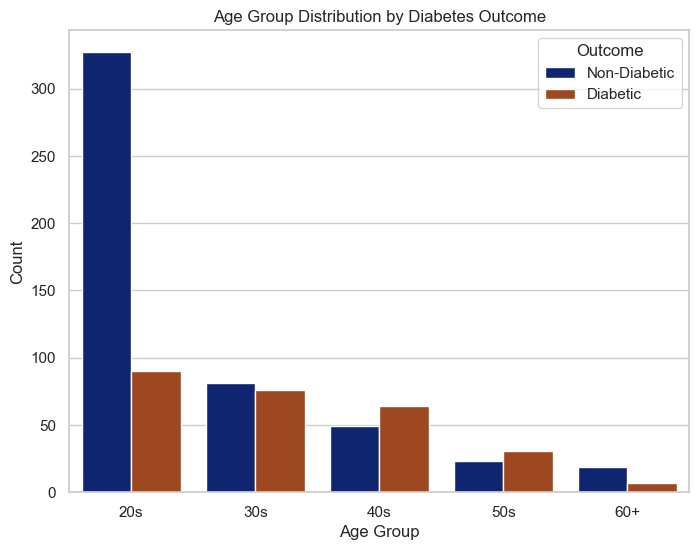

In [165]:
# AgeGroup vs. Diabetes Outcome (Bar Plot) - Age categories might reveal patterns where certain age groups are more likely to be diabetic.
# Age Group vs Outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Outcome', data=df, palette='dark')
plt.title("Age Group Distribution by Diabetes Outcome")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Outcome", labels=["Non-Diabetic", "Diabetic"])
plt.show()


C:\Users\mokas\AppData\Local\Temp\ipykernel_27704\3317183751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


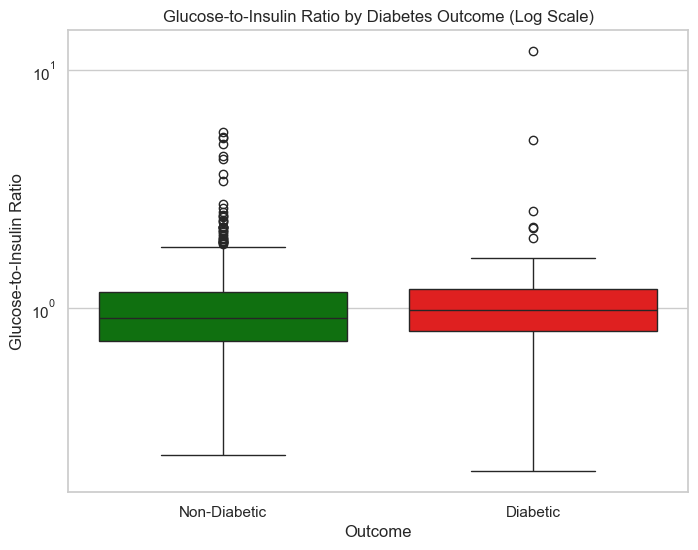

In [166]:
# Glucose-to-Insulin Ratio vs. Diabetes Outcome (Box Plot) - This will show how the ratio differs between Diabetic and Non-Diabetic groups.

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Outcome',
    y='Glucose_Insulin_Ratio',
    data=df,
    palette={'0': 'green', '1': 'red'}
)
plt.title("Glucose-to-Insulin Ratio by Diabetes Outcome (Log Scale)")
plt.xlabel("Outcome")
plt.ylabel("Glucose-to-Insulin Ratio")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.yscale('log')
plt.show()



In [167]:
# Step 4: Feature Scaling 


# One-hot encode 'AgeGroup' (or other categorical features)
df_encoded = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)

# Separate features and target
X_features = df_encoded.drop('Outcome', axis=1)
y_target = df_encoded['Outcome']

# Apply StandardScaler to numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)

# Check results
print(X_scaled_df.head())


   Pregnancies   Glucose  BloodPressure   Insulin       BMI       Age  \
0     0.639947  0.866045      -0.031990 -0.181541  0.166619  1.425995   
1    -0.844885 -1.205066      -0.528319 -0.181541 -0.852200 -0.190672   
2     1.233880  2.016662      -0.693761 -0.181541 -1.332500 -0.105584   
3    -0.844885 -1.073567      -0.528319 -0.540642 -0.633881 -1.041549   
4    -1.141852  0.504422      -2.679076  0.316566  1.549303 -0.020496   

   Insulin_log  Glucose_Insulin_Ratio  AgeGroup_30s  AgeGroup_40s  \
0     0.018491               0.175666     -0.506908      2.407584   
1     0.018491              -0.555338      1.972744     -0.415354   
2     0.018491               0.581780      1.972744     -0.415354   
3    -0.552520              -0.171942     -0.506908     -0.415354   
4     0.612171              -0.356435      1.972744     -0.415354   

   AgeGroup_50s  AgeGroup_60+  
0      -0.27501     -0.187191  
1      -0.27501     -0.187191  
2      -0.27501     -0.187191  
3      -0.27501   

In [169]:
# Build a Baseline Model
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_target, test_size=0.2, random_state=42, stratify=y_target)


In [170]:
# Build a Baseline Model like Logistic Regression for the first baseline

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[83 17]
 [24 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

Accuracy: 0.7337662337662337


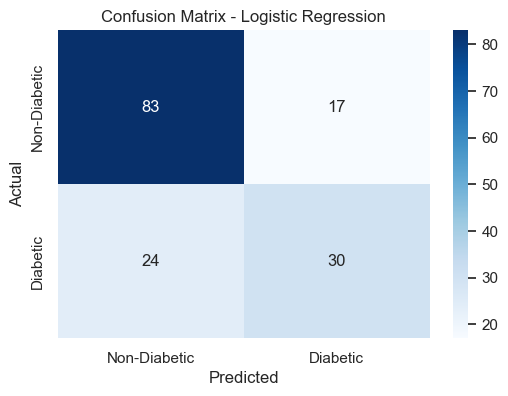

In [171]:
# Plot the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
